In [2]:
%load_ext autoreload
%autoreload 2
# .py 파일을 수정했을때 실시간으로 업데이트 되게 해주는 코드 

In [3]:
# Project Image Filtering - Tests on my_imfilter function
# by Soochahn Lee @ Kookmin University
# For Introduction to Computer Vision course, Spring 2024
import os
from skimage.transform import rescale
import numpy as np
import matplotlib.pyplot as plt
from helpers import load_image, save_image
from student_20201457 import my_imfilter, my_imfilter_vect
from student_20201457 import my_mean_filter, my_gauss_2D, my_gauss_1D

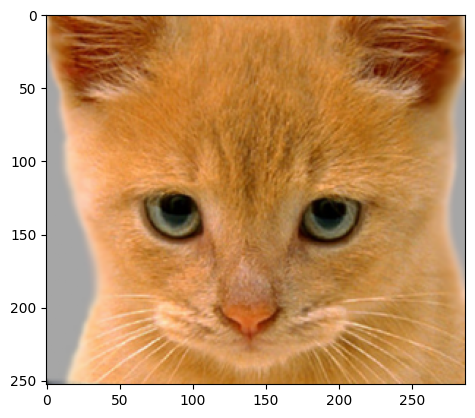

In [6]:
# Load images, make directory to store results, etc.
resultsDir = '.' + os.sep + 'results'
if not os.path.exists(resultsDir):
    os.mkdir(resultsDir)

test_image = load_image('data/cat.bmp')

# 아래 두개 코드중 실행되는 코드로 실행
# test_image = rescale(test_image, 0.7, mode='reflect', multichannel=True)  
test_image = rescale(test_image, 0.7, mode='reflect', channel_axis=-1)

plt.imshow(test_image)
plt.show()

In [7]:
print(type(test_image))
print(test_image.shape)

<class 'numpy.ndarray'>
(253, 287, 3)


my_imfilter function in student.py needs to be implemented
identity filter: CORRECT
(253, 287, 3)
(253, 287, 3)


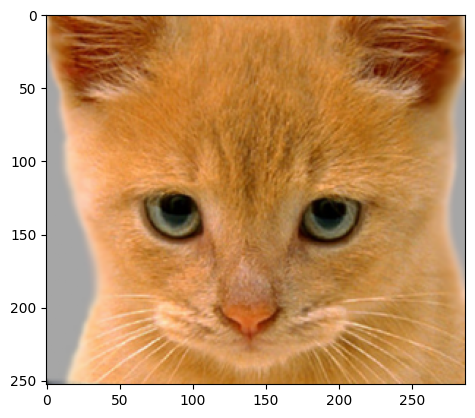

In [8]:
'''
단위필터 (Identity filter)
이 필터는 경계선 처리 방식 옵션과 무관하게 아무 기능도 없어야 함
This filter should do nothing regardless of the padding method you use.
'''
# define the ndarray identity_filter so that filter output is same as input
identity_filter = np.array(([0, 0, 0], [0, 1, 0], [0, 0, 0])) # <-- code to define filter
# run filter
identity_image = my_imfilter(test_image, identity_filter)

# check if input and output are identical
#if identity_image.all() == test_image.all():
if np.abs((identity_image - test_image).sum()) < 1e-6:
    print("identity filter: CORRECT")
else:
    print("identity filter: WRONG")


print(test_image.shape)
print(identity_image.shape)
# visualize result image
plt.imshow(identity_image)
plt.show()

# uncomment code below to save result image
#done = save_image('../results/identity_cat_image.png', identity_image)

my_imfilter function in student.py needs to be implemented


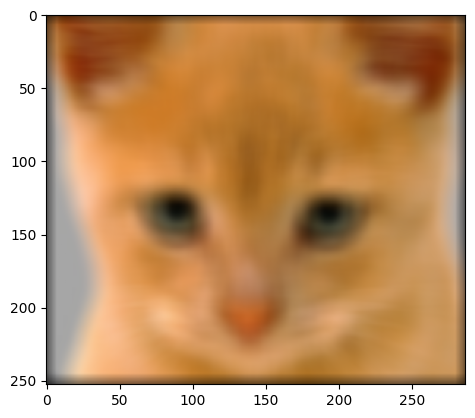

In [9]:
'''
평균 필터를 통해 smoothing 기능 적용
smoothing with mean filter
이 필터는 고주파수 성분을 일부 제거함
Filters high frequencies.
'''
# define mean filter (make sure sum of all kernel values = 1)
mean_filter = my_mean_filter(15, 15) # <-- code to define filter
# run filter
blur_image = my_imfilter(test_image, mean_filter)


# visualize result image
plt.imshow(blur_image)
plt.show()

# save image
#done = save_image(resultsDir + os.sep + '1515cat_blur_image.png', blur_image)

my_imfilter function in student.py needs to be implemented


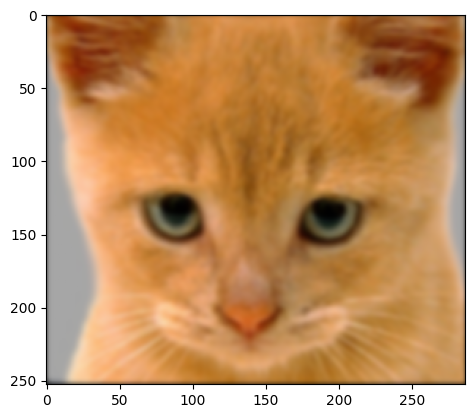

In [10]:
'''
가우시안 필터를 통해 smoothing 기능 적용
smoothing with 2D Gaussian filter
이 필터는 고주파수 성분을 일부 제거함
Filters high frequencies, without artifacts.
'''
# define 2D gaussian kernel with mean=0 and sigma = s
s, k = 1.7, 11
gauss_filter_2D = my_gauss_2D(s, k) # <-- code to define filter (make sure sum of all kernel values = 1)

# apply 2D Gaussian filter in x-axis direction
blur_image_Gauss2D = my_imfilter(test_image, gauss_filter_2D)

plt.imshow(blur_image_Gauss2D)
plt.show()
#done = save_image(resultsDir + os.sep +'s1.7_k11_cat_blur_image_Gauss2D.png', blur_image_Gauss2D)

my_imfilter function in student.py needs to be implemented
my_imfilter function in student.py needs to be implemented


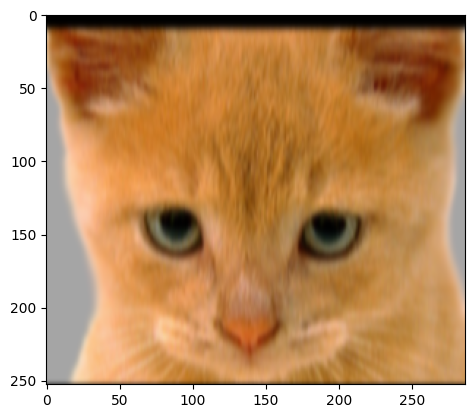

In [11]:
'''
가우시안 필터를 통해 smoothing 기능 적용
smoothing with 1D Gaussian filters
이 필터는 2D 가우시안 필터와 동등한 결과를 도출함
Should be equivalent to 2D Gaussian filter
'''
# define 1D gaussian kernel with mean=0 and sigma = s
s, k = 1.7, 11
gauss_filter_1D = my_gauss_1D(s, k)  # <-- code to define filter (make sure sum of all kernel values = 1)


# apply 1D Gaussian filter in x-axis direction
blur_image_Gauss1Dx = my_imfilter(test_image, gauss_filter_1D)
# apply 1D Gaussian filter in y-axis direction
# notice the T operator which transposes the filter
blur_image_Gauss1D = my_imfilter(blur_image_Gauss1Dx, gauss_filter_1D.T)

plt.imshow(blur_image_Gauss1D)
plt.show()
#done = save_image(resultsDir + os.sep + 's1.7_k11_cat_large_blur_image.png', blur_image_Gauss1D)

my_imfilter function in student.py needs to be implemented


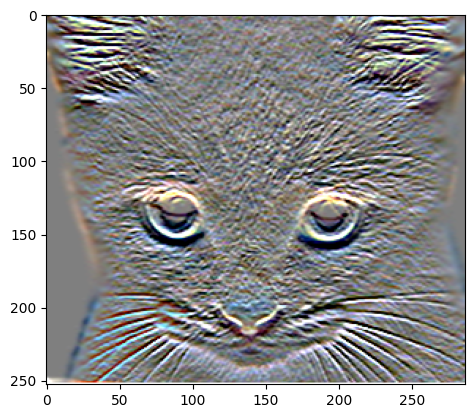

In [12]:
'''
방향성 필터 (Sobel 연산자 - 수직방향)
Oriented filter (Sobel operator - vertical)
'''
# define vertical Sobel filter
sobel_filter_ver = np.array(([1, 2, 1], [0, 0, 0], [-1, -2, -1])) # <-- code to define filter

# apply filtering
sobel_image_ver = my_imfilter(test_image, sobel_filter_ver)
# 0.5 added because the output image is centered around zero otherwise and mostly black
sobel_image_ver = np.clip(sobel_image_ver+0.5, 0.0, 1.0)

plt.imshow(sobel_image_ver)
plt.show()
#done = save_image(resultsDir + os.sep + 'sobel_cat_image_ver.png', sobel_image_ver)

my_imfilter function in student.py needs to be implemented


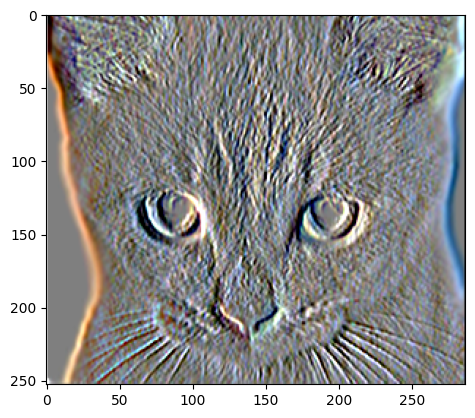

In [13]:
'''
방향성 필터 (Sobel 연산자 - 수평방향)
Oriented filter (Sobel operator)
'''
# define horizontal Sobel filter
sobel_filter_hor = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1])) # <-- code to define filter

# apply filtering
sobel_image_hor = my_imfilter(test_image, sobel_filter_hor)
# 0.5 added because the output image is centered around zero otherwise and mostly black
sobel_image_hor = np.clip(sobel_image_hor+0.5, 0.0, 1.0)

plt.imshow(sobel_image_hor)
plt.show()
#done = save_image(resultsDir + os.sep + 'sobel_cat_image_hor.png', sobel_image_hor)

my_imfilter function in student.py needs to be implemented


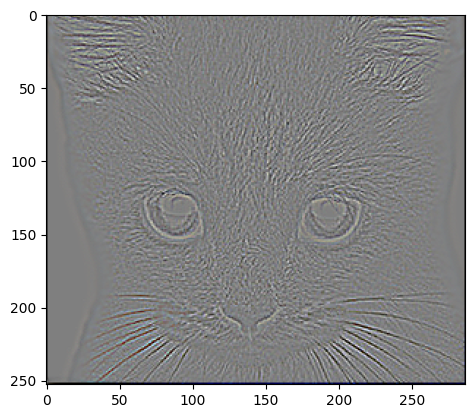

In [14]:
'''
고주파 통과 필터 (이산 라플라시안)
High pass filter (discrete Laplacian)
'''
# define Laplacian filter
laplacian_filter = np.array(([0, 1, 0], [1, -4, 1], [0, 1, 0])) # <-- code to define filter

# apply filtering
laplacian_image = my_imfilter(test_image, laplacian_filter)

# added because the output image is centered around zero otherwise and mostly black
laplacian_image = np.clip(laplacian_image+0.5, 0.0, 1.0)
plt.figure()
plt.imshow(laplacian_image)
plt.show()
#done = save_image(resultsDir + os.sep + 'laplacian_cat_image.jpg', laplacian_image)

In [18]:
'''
Vectorization 미적용 & 적용 함수 비교
Comparison between my_imfilter() and my_imfilter_vect() 
'''
import time

# define 2D gaussian kernel with mean=0 and sigma = s
s, k = 6, 4
gauss_filter_2D = my_gauss_2D(s, k) # <-- code to define filter (make sure sum of all kernel values = 1)

# filtering with unvectorized function
start = time.perf_counter()
filter_img = my_imfilter(test_image, gauss_filter_2D)
end = time.perf_counter()
time_unv = end-start

# filtering with vectorized function
start = time.perf_counter()
filter_img_v = my_imfilter_vect(test_image, gauss_filter_2D)
end = time.perf_counter()
time_vect = end-start

print(f"elapsed times for unvectorized / vectorized filtering functions are {time_unv:.3f} vs {time_vect:.3f} ")

# check if input and output are identical
if filter_img.all() == filter_img_v.all():
    print("vectorized and unvectorized functions are equivalent")
else:
    print("vectorized filtering results are not equivalent to unvectorized filtering!")

elapsed times for unvectorized / vectorized filtering functions are 1.377 vs 0.452 
vectorized and unvectorized functions are equivalent
